In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("tree.csv")
df

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [3]:
df = df.drop('Days', axis=1)
df

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       5 non-null      object
 1   Temperature   5 non-null      object
 2   Routine       5 non-null      object
 3   Wear Jacket?  5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [5]:
x = df.drop('Wear Jacket?', axis=1)
x

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [6]:
y = df['Wear Jacket?']
y

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

## Data Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [15]:
# x.Outlook = le.fit_transform(df['Outlook'])
x = x.apply(le.fit_transform)
x

,Outlook,Temperature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
classifier = DecisionTreeClassifier()

In [16]:
classifier.fit(x, y)

DecisionTreeClassifier()

In [18]:
classifier.predict([[1, 0, 1]])

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

## Visualize Tree

In [19]:
from sklearn import tree

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

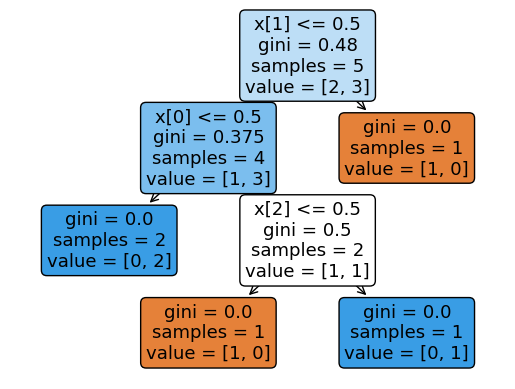

In [21]:
tree.plot_tree(classifier, filled=True, rounded=True)

In [22]:
x.columns

Index(['Outlook', 'Temperature', 'Routine'], dtype='object')

[Text(0.6, 0.875, 'Temperature <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

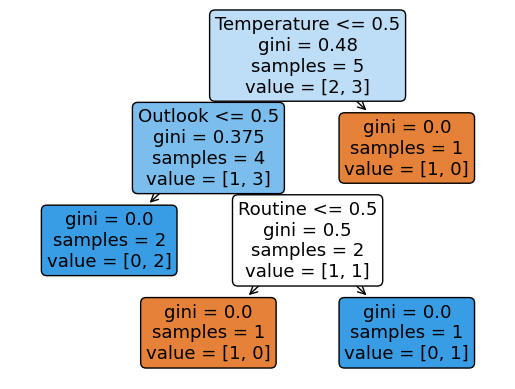

In [23]:
tree.plot_tree(classifier, filled=True, rounded=True, feature_names=x.columns)

[Text(0.6, 0.875, 'Temperature <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

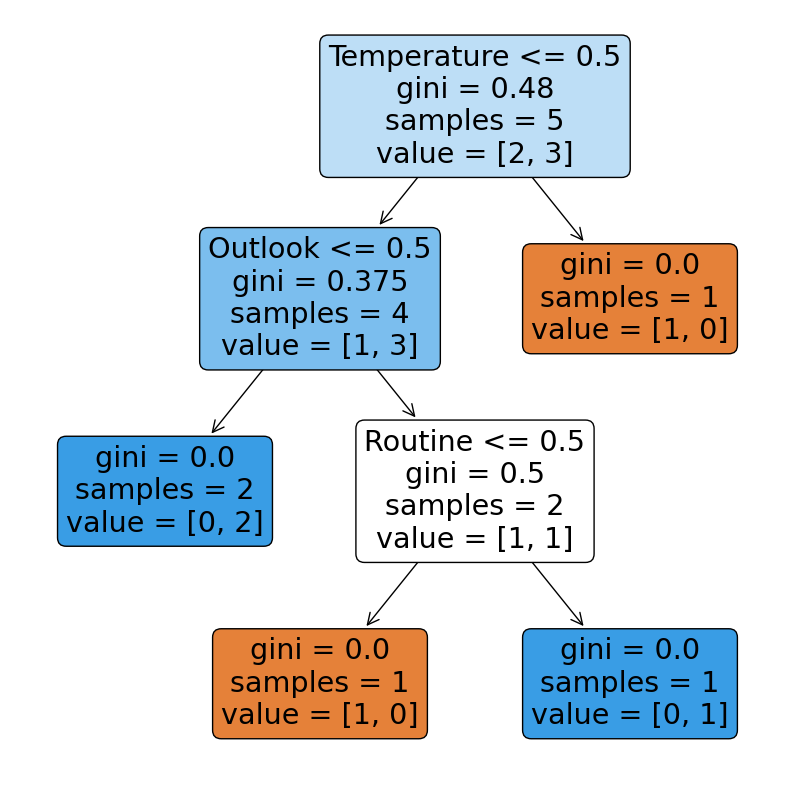

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
tree.plot_tree(classifier, filled=True, rounded=True, feature_names=x.columns)